In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8397982716560364, 'full_set_var_values': [0.05611594766378403, 0.04465611279010773, 0.03129613772034645, 0.030705329030752182, 0.02727535367012024, 0.024872951209545135, 0.022365424782037735, 0.021153714507818222, 0.019139515236020088, 0.017565401270985603, 0.016443615779280663, 0.015289866365492344, 0.01448085717856884, 0.013943171128630638, 0.01301494799554348, 0.0124394241720438, 0.012035754509270191, 0.011789215728640556, 0.011512253433465958, 0.011281601153314114, 0.010572782717645168, 0.010197187773883343, 0.009920958429574966, 0.00952432956546545, 0.009425406344234943, 0.009009674191474915, 0.008841355331242085, 0.008641671389341354, 0.008285819552838802, 0.008250020444393158, 0.008010626770555973, 0.007741503417491913, 0.007578868418931961, 0.007377189584076405, 0.007259075995534658, 0.007116722874343395, 0.007054456509649754, 0.0068313367664813995, 0.006595098413527012, 0.006447979249060154, 0.00639139860868454, 0.006265939213335514,

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']

In [7]:
r2_values = variance_metrics['r2_values']
mn = min(variance_metrics['r2_values'])
mx = max(variance_metrics['r2_values'])

norm = mx - mn

scaled_r2_values = [(val - mn)/norm for val in r2_values]
scaled_r2_values

[0.0,
 0.5227793328805649,
 0.7301250151302561,
 0.8355102915209134,
 0.8977687551786429,
 0.9197419016952505,
 0.94323098828337,
 0.9783250135811133,
 0.9917093666441467,
 1.0]

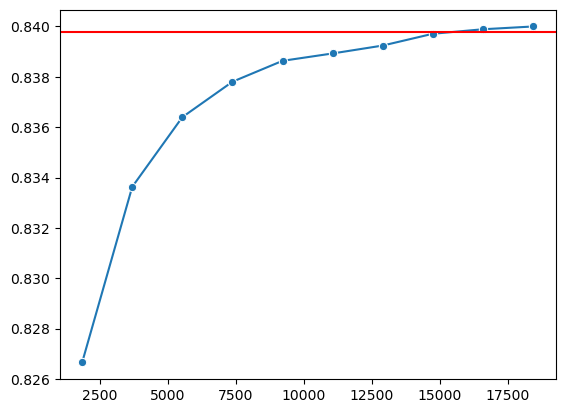

In [20]:
graph = sns.lineplot(x=variance_metrics['subset_sizes'], y=variance_metrics['r2_values'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')
plt.show()

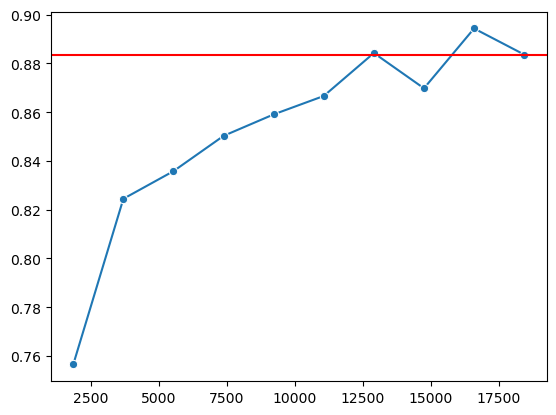

In [5]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_accuracies'], marker="o")
graph.axhline(modelling_metrics['test_accuracies'][-1], color='red')
plt.show()

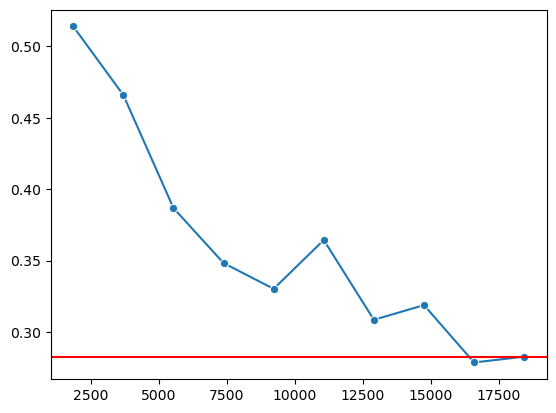

In [6]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_losses'], marker="o")
graph.axhline(modelling_metrics['test_losses'][-1], color='red')
plt.show()

In [8]:
scaled_r2_values

[0.0,
 0.5227793328805649,
 0.7301250151302561,
 0.8355102915209134,
 0.8977687551786429,
 0.9197419016952505,
 0.94323098828337,
 0.9783250135811133,
 0.9917093666441467,
 1.0]

In [10]:
test_accuracies = modelling_metrics['test_accuracies']
mn = min(test_accuracies)
mx = max(test_accuracies)

norm = mx - mn

scaled_acc_values = [(val - mn)/norm for val in test_accuracies]
scaled_acc_values

[0.0,
 0.49315068493150704,
 0.5753424657534252,
 0.6803652968036529,
 0.7442922374429228,
 0.7990867579908681,
 0.9269406392694064,
 0.8219178082191786,
 1.0,
 0.9223744292237449]

In [13]:
dic = {'scaled_r2_values': scaled_r2_values, 'scaled_acc_values': scaled_acc_values}
results_df = pd.DataFrame(dic)

In [14]:
from scipy.stats import pearsonr

pearsonr(results_df['scaled_r2_values'], results_df['scaled_acc_values'])

PearsonRResult(statistic=0.9748376830867937, pvalue=1.7013995720932268e-06)

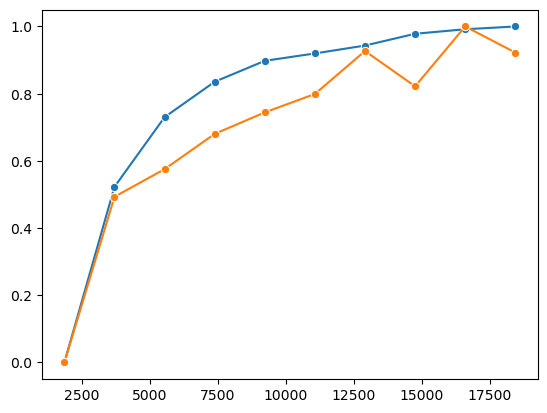

In [21]:
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_r2_values, marker="o")
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_acc_values, marker="o")
plt.show()

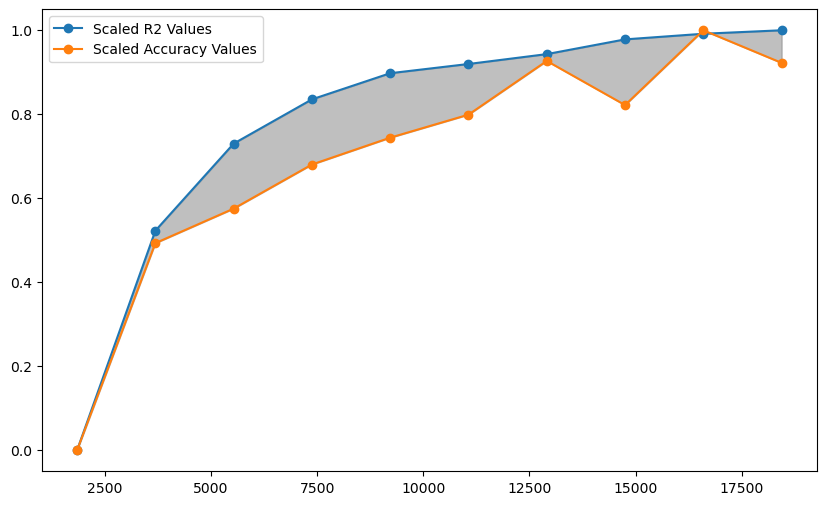

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(variance_metrics['subset_sizes'], scaled_r2_values, marker="o", label='Scaled R2 Values')
plt.plot(variance_metrics['subset_sizes'], scaled_acc_values, marker="o", label='Scaled Accuracy Values')
plt.fill_between(variance_metrics['subset_sizes'], scaled_r2_values, scaled_acc_values, color='gray', alpha=0.5)
plt.legend()
plt.show()